In [1]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

import json
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

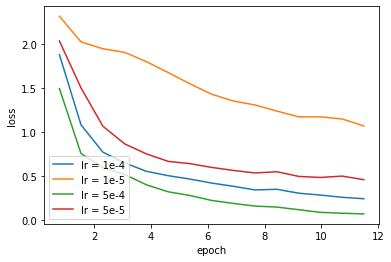

In [7]:
d1 = json.load(open('/content/trainer_state_1e-4.json', 'r'))
d2 = json.load(open('/content/trainer_state_1e-5.json', 'r'))
d3 = json.load(open('/content/trainer_state_5e-4.json', 'r'))
d4 = json.load(open('/content/trainer_state_5e-5.json', 'r'))
# x = [i['epoch'] for i in d2['log_history']]
# y = [i['loss'] for i in d2['log_history']]
# plt.plot(x,y, color='maroon', marker='o')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')

d1 = pd.json_normalize(d1, record_path =['log_history'])
d1['Init_lr'] = 'lr = 1e-4'

d2 = pd.json_normalize(d2, record_path =['log_history'])
d2['Init_lr'] = 'lr = 1e-5'

d3 = pd.json_normalize(d3, record_path =['log_history'])
d3['Init_lr'] = 'lr = 5e-4'

d4 = pd.json_normalize(d4, record_path =['log_history'])
d4['Init_lr'] = 'lr = 5e-5'

d = pd.concat([d1,d2,d3,d4]).reset_index()

sb.lineplot(data=d, x='epoch', y='loss', hue='Init_lr')
plt.legend(loc='lower left')
plt.savefig("/content/chemprot_LR.jpg")